##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# enable inline plotting
%matplotlib inline

# Hand Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect hand landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [2]:
!pip3 install -q mediapipe

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

Then download an off-the-shelf model bundle. Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker#models) for more information about this model bundle.

In [3]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

## Visualization utilities

In [9]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    print(hand_landmarks_proto)
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [6]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

import cv2

img = cv2.imread("image.jpg")
# show the image
cv2.imshow("image", img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [7]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run hand landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/hand_landmarker/python) to learn more about configuration options that this solution supports.


landmark {
  x: 0.39291876554489136
  y: 0.7066097855567932
  z: -3.2929702342698874e-07
}
landmark {
  x: 0.3431207537651062
  y: 0.7504482865333557
  z: -0.019821839407086372
}
landmark {
  x: 0.2708955705165863
  y: 0.7737336158752441
  z: -0.027366194874048233
}
landmark {
  x: 0.20807714760303497
  y: 0.7796703577041626
  z: -0.036947235465049744
}
landmark {
  x: 0.15704932808876038
  y: 0.7829771637916565
  z: -0.04580754041671753
}
landmark {
  x: 0.202087864279747
  y: 0.7279692888259888
  z: 0.004851050209254026
}
landmark {
  x: 0.1329536736011505
  y: 0.7431303858757019
  z: -0.01851033978164196
}
landmark {
  x: 0.09457892924547195
  y: 0.758748471736908
  z: -0.04270417243242264
}
landmark {
  x: 0.06427459418773651
  y: 0.7747345566749573
  z: -0.05866234004497528
}
landmark {
  x: 0.1926373541355133
  y: 0.700761616230011
  z: -3.6313896998763084e-05
}
landmark {
  x: 0.11083470284938812
  y: 0.7078337073326111
  z: -0.018200315535068512
}
landmark {
  x: 0.058709204196

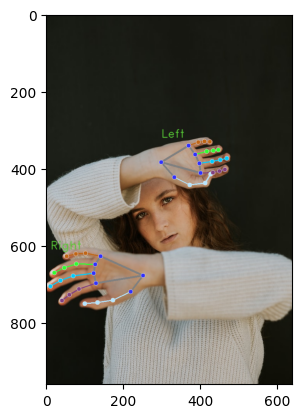

In [10]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2.imshow("image",cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

import matplotlib.pyplot as plt
plt.imshow(annotated_image)
plt.show()

In [11]:
len(detection_result.hand_landmarks)

2

In [12]:
detection_result.handedness

[[Category(index=1, score=0.9357693195343018, display_name='Right', category_name='Right')],
 [Category(index=0, score=0.9609301090240479, display_name='Left', category_name='Left')]]

In [13]:
len(detection_result.hand_landmarks[0])
len(detection_result.hand_landmarks)

2

0.39291876554489136 0.7066097855567932


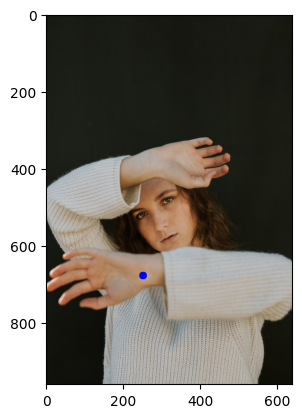

In [19]:
p1 = detection_result.hand_landmarks[0][0]
print(p1.x, p1.y)

# display a red dot at the first landmark
annotated_image = np.copy(image.numpy_view())
cv2.circle(annotated_image, (int(p1.x * annotated_image.shape[1]), int(p1.y * annotated_image.shape[0])), 10, (0, 0, 255), -1)
plt.imshow(annotated_image)
plt.show()
